In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import scanpy as sc
%matplotlib inline

To understand the following code is STRONGLY RECOMMENDED to 
see this part (https://anndata.readthedocs.io/en/latest/anndata.AnnData.html) 
of the AnnData documentation

In [2]:
#scanpy can open h5ad file with the read_h5ad function
#this function returns an AnnData object
adata = sc.read_h5ad("Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")

In [4]:
covidX   = adata.X    #actual gene expression data
covidobs = adata.obs  #data about the patients
covidvar = adata.var  #data about the distribution of each gene
coviduns = adata.uns  #metadata of the object

In [5]:
covidX #ndarray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
covidobs.head() #pandas df

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,...,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler
covid_555_1.1,ICU,13,9,9,C1 A,-0.026053,0.015625,M,COVID,NonVent,...,1222.0,1682.0,125,126,1.309329,0.245499,0.081833,46.644844,12,Erythroblast
covid_555_1.2,ICU,10,9,9,C1 A,0.023525,-0.000322,M,COVID,NonVent,...,1099.0,1700.0,160,160,13.102820,0.363967,0.363967,58.780708,9,B_cell
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,...,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,...,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,...,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell


In [7]:
covidvar.head() #pandas df

,Selected,sct_detection_rate,sct_gmean,sct_residual_mean,sct_residual_variance,sct_variable,sct_variance
5S-rRNA,0.0,0.000261,0.000189,0.000651,1.164300,0,0.000321
7SK,0.0,0.027394,0.020371,0.005464,1.062872,0,0.035997
A1BG,0.0,0.001785,0.001268,0.002331,1.063613,0,0.002062
A1BG-AS1,0.0,0.000501,0.000356,0.001971,1.150165,0,0.000561
A1CF,0.0,0.001324,0.000942,0.002839,1.158183,0,0.001502


In [8]:
#we need to load our expression data array in a pandas df
#we'll use the indexes of the obs df for the indexes (rows)
#and the indexes of the var df for the columns
patients = covidobs.index
genes = covidvar.index
exp_df = pd.DataFrame(data = covidX, columns = genes, index = patients)
exp_df.head()

,5S-rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,A4GNT,...,TRBJ2-6,TRBV10-1,TRBV6-4,TRBV6-8,TTLL13,UGT2B17,Vault,XX-CR54.1,XXbac-B135H6.18,ZBTB40-IT1
covid_555_1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
reducer = umap.UMAP(random_state = 42)

In [10]:
ventdata = []
i = 0
for id, row in covidobs.iterrows():
    if row["Ventilated"] != "Healthy":
        ventdata.append(covidX[i])

In [11]:
reducer.fit(ventdata)

UMAP(random_state=42)

In [13]:
vent = [] 
nonvent = []
for id, row in covidobs.iterrows():
    if row["Ventilated"] == "Vent":
        vent.append(covidX[i])
    elif row["Ventilated"] == "NonVent":
        nonvent.append(covidX[i])

In [15]:
umap_nonvent = reducer.transform(nonvent)

In [15]:
umap_vent = reducer.transform(vent)

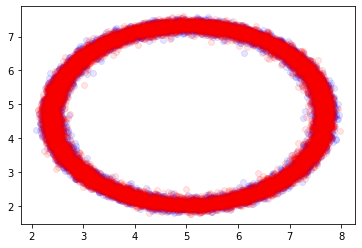

In [16]:
for x, y in umap_nonvent:
    plt.plot(x, y, "o", c = "b", alpha = 0.1)
for x, y in umap_vent:
    plt.plot(x, y, "o", c = "r", alpha = 0.1)

In [172]:
covidobs["Ventilated"]

covid_555_1.1    NonVent
covid_555_1.2    NonVent
covid_555_1.3    NonVent
covid_555_1.7    NonVent
covid_555_1.8    NonVent
                  ...   
HIP045.2543      Healthy
HIP045.2544      Healthy
HIP045.2545      Healthy
HIP045.2546      Healthy
HIP045.2547      Healthy
Name: Ventilated, Length: 44721, dtype: category
Categories (3, object): ['Healthy', 'NonVent', 'Vent']

In [173]:
covidobs

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,...,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler
covid_555_1.1,ICU,13,9,9,C1 A,-0.026053,0.015625,M,COVID,NonVent,...,1222.0,1682.0,125,126,1.309329,0.245499,0.081833,46.644844,12,Erythroblast
covid_555_1.2,ICU,10,9,9,C1 A,0.023525,-0.000322,M,COVID,NonVent,...,1099.0,1700.0,160,160,13.102820,0.363967,0.363967,58.780708,9,B_cell
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,...,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,...,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,...,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,N/A,7,0,0,H6,0.588374,0.092001,M,Healthy,Healthy,...,6103.0,1959.0,2460,1080,6.898247,3.637555,2.867442,10.797968,6,Monocyte
HIP045.2544,N/A,21,0,0,H6,1.295145,0.045697,M,Healthy,Healthy,...,7324.0,2088.0,2488,1031,6.485527,6.157837,4.929000,12.738940,20,Monocyte
HIP045.2545,N/A,21,0,0,H6,0.892457,0.062819,M,Healthy,Healthy,...,6368.0,1929.0,2511,1021,4.742462,6.171483,4.978015,14.400126,20,T_cells
HIP045.2546,N/A,11,0,0,H6,0.020954,0.036953,M,Healthy,Healthy,...,6669.0,1918.0,2650,1063,4.573400,3.328835,2.998950,14.574899,10,Monocyte
